# <p style="background-color:#2e2b5f;font-family:Creepster,cursive;color:#ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">👻 La Maldición del Dataset Perdido 🎃</p>
---

[![Banner-Maldici-n.png](https://i.postimg.cc/FRY3zfqR/Banner-Maldici-n.png)](https://postimg.cc/sQRv023d)

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#sec_1">Introducción</a>  
2. <a href="#sec_2">Exploración del set de datos</a>  
3. <a href="#sec_3">Selección de Muestras</a>  
4. <a href="#sec_4">Pre-selección de variables</a>  
5. <a href="#sec_5">Preparación de datos</a>
6. <a href="#sec_6">Modelo de regresión Lineal</a>  
7. <a href="#sec_7">Métricas de desempeño</a> 
8. <a href="#sec_8">Conclusiones y Recomendaciones</a>     

 
</font>
</div>

<a id='sec_1'></a>
## `1. Introducción`

`🎃 La Maldición del Dataset Perdido: ¡Resuelta! 🎃`

- *Errores ocultos liberados: 💻👻* Los datos que estaban sumidos en la oscuridad de valores erróneos y datos faltantes han sido restaurados. Cada campo fue cuidadosamente analizado, y logrado desentrañar la verdad que se escondía entre líneas de código. 📜✨

- *Valores perdidos recuperados: 🕵️‍♀️🌟* Como un verdadero detective de datos, encontre las piezas que faltaban, devolviendo la consistencia y la integridad a nuestro dataset. Las sombras no fueron rivales para mi atención al detalle y mi capacidad para detectar cada vacío oculto. 🔍💡

- *Inconsistencias corregidas: 🛠️🧩* Has restablecido el orden donde reinaba el caos. Las variables desalineadas y los errores misteriosos que antes perturbaban la fluidez de nuestro análisis fueron corregidos uno por uno, hasta devolver al dataset su brillo original. 🌟

**1.2. Recursos disponibles**
- [Set de datos Perdidos](data/DMC_Concurso_Dataset_Perdido.csv)

**1.3. Diccionario de datos disponibles**
| **Clave**  | **Descripción**                                                                 | **Tipo de dato** |
|------------|---------------------------------------------------------------------------------|------------------|
| age        | Edad del cliente                                                                | Int              |
| job        | Profesión del cliente                                                           | Object           |
| marital    | Estado civil del cliente                                                        | Object           |
| education  | Nivel de educación del cliente                                                  | Object           |
| default    | Si el cliente tiene un crédito en incumplimiento (no: no, yes: sí)              | Object           |
| balance    | Balance de la cuenta del cliente en dólares estadounidenses                     | Int              |
| housing    | Si el cliente tiene un préstamo de vivienda (no: no, yes: sí)                   | Object           |
| loan       | Si el cliente tiene un préstamo personal (no: no, yes: sí)                      | Object           |
| contact    | Tipo de contacto utilizado para la campaña (cellular, telephone, etc.)          | Object           |
| day        | Día del mes en que se contactó al cliente                                       | Int              |
| month      | Mes en que se contactó al cliente                                               | Object           |
| duration   | Duración del último contacto en segundos                                        | Int              |
| campaign   | Número de contactos realizados durante esta campaña                             | Int              |
| pdays      | Días transcurridos desde que el cliente fue contactado por última vez           | Int              |
| previous   | Número de contactos realizados antes de esta campaña                            | Int              |
| poutcome   | Resultado de la campaña anterior                   | Object           |
| y          | Si el cliente suscribió el producto (yes: sí, no: no)                           | Object           |


<a id='sec_2'></a>
## `2. Exploración del set de datos`

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Verificar si hay datos faltantes y valores duplicados
5. Verificar si hay datos outliers mediante gráficos
6. Realizar el resumen estadístico
7. Verificar datos anomalos en columnas categóricas

**2.1. Leer el set de datos**

In [262]:
#Importación de librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [263]:
df =  pd.read_csv('data/DMC_Concurso_Dataset_Perdido.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**2.2. Entender tamaño, columnas y filas del set de datos**

In [264]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 20739
El número de columnas es: 17


**2.3. Entender qué tipos de datos tenemos en cada columna**

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        20739 non-null  int64 
 1   job        20739 non-null  object
 2   marital    20739 non-null  object
 3   education  20739 non-null  object
 4   default    20739 non-null  object
 5   balance    20739 non-null  int64 
 6   housing    20739 non-null  object
 7   loan       20739 non-null  object
 8   contact    20739 non-null  object
 9   day        20739 non-null  int64 
 10  month      20739 non-null  object
 11  duration   20739 non-null  int64 
 12  campaign   20739 non-null  int64 
 13  pdays      20739 non-null  int64 
 14  previous   20739 non-null  int64 
 15  poutcome   20739 non-null  object
 16  y          20739 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.7+ MB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos de tipo `int`  y `Object`.
> - Al poder observar a mas detalle se tiene en cantida de tipo de dato `int64(7)`, `object(10)`

**2.4. Verificar si hay datos faltantes y valores duplicados**

In [266]:
df.duplicated().sum()

1

>**Observación**
> - Al observar se pudo evidenciar que `si hay valores duplicados`, las cuales se eliminaran en pasos posteriores

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        20739 non-null  int64 
 1   job        20739 non-null  object
 2   marital    20739 non-null  object
 3   education  20739 non-null  object
 4   default    20739 non-null  object
 5   balance    20739 non-null  int64 
 6   housing    20739 non-null  object
 7   loan       20739 non-null  object
 8   contact    20739 non-null  object
 9   day        20739 non-null  int64 
 10  month      20739 non-null  object
 11  duration   20739 non-null  int64 
 12  campaign   20739 non-null  int64 
 13  pdays      20739 non-null  int64 
 14  previous   20739 non-null  int64 
 15  poutcome   20739 non-null  object
 16  y          20739 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.7+ MB


>**Observación**
> - Al observar se pudo evidenciar que `no hay valores nulos.`

**2.5. Verificar si hay datos outliers mediante gráficos**

In [268]:
# Carpeta para guardar las imágenes
output_dir = './Gráficos_Outliers'
os.makedirs(output_dir, exist_ok=True)

In [269]:
numeric_columns = df.select_dtypes(include='number').columns.to_list()

plt.style.use('ggplot')
sns.set_context("talk")

for column in numeric_columns:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(y=df[column], color='skyblue') 
    plt.title(f'Boxplot de {column}', fontsize=16)  
    plt.ylabel('cantidad', fontsize=14) 
    plt.xlabel(column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7) 
    plt.savefig(f'{output_dir}/Boxplot_de_{column}.png', bbox_inches='tight') 
    plt.close()

print(f'Gráficos guardados con éxito!')

Gráficos guardados con éxito!


*Boxplot de campaign de ejemplo*

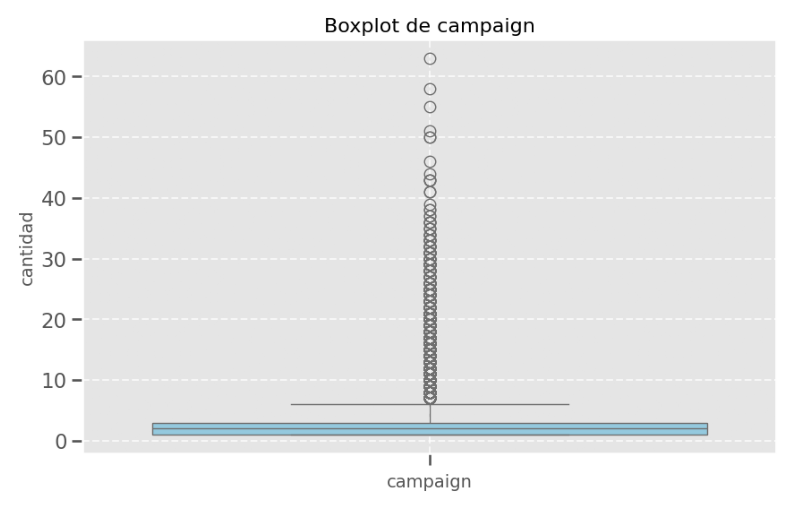

In [270]:
ruta = 'Gráficos_Outliers/Boxplot_de_campaign.png'
plt.figure(figsize=(10, 8))
img = mpimg.imread(ruta)
plt.imshow(img)
plt.axis('off') 
plt.show()

>**Observación**
> - Al observar la carpeta `Gráficos_Outliers` y revisar los gráficos generados se pudo evidenciar que `Si hay valores outliers en las columnas age, balance, campaign, duration, pdays y previoucs`, el cual se hara su tratamiento en pasos posteriores para cada columna.

**2.6. Realizar el resumen estadístico**

In [271]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,20739.0,41.095762,11.251527,20.0,33.0,40.0,49.0,530.0
balance,20739.0,1148.639230,4501.290387,-8019.0,30.0,350.0,1191.0,527532.0
day,20739.0,15.976469,8.588330,1.0,8.0,15.0,23.0,31.0
duration,20739.0,259.027243,261.613962,-1389.0,103.0,178.0,317.0,3881.0
campaign,20739.0,3.089541,3.660176,1.0,1.0,2.0,3.0,63.0
pdays,20739.0,-0.990935,1.305461,-1.0,-1.0,-1.0,-1.0,187.0
previous,20739.0,0.000241,0.034720,0.0,0.0,0.0,0.0,5.0


>**Observaciónes**
> - En la `columna age`, hay un valor máximo inusualmente alto `(530 años)`, lo que indica que puede haber un error en los datos.
> - En la `columna balance`, hay valores extremadamente negativos y positivos `(mínimo de -8019 y máximo de 527532)`, lo cual podría requerir más análisis para verificar si son datos correctos.
> - La `columna duration` también muestra valores negativos, lo cual es incorrecto para la duración de una llamada `(mínimo de -1389 segundos).`
> - La `columna pdays` hay un valor máximo inusualmente alto `(187)` lo que indica que puede haber un error en los datos ya que casi todos los pdays son -1.
> - La `columna previous` hay un valor máximo inusualmente alto `(5)` lo que indica que puede haber un error en los datos ya que casi todos los previous son 0.

**2.7. Verificar datos anomalos en columnas categóricas**

In [272]:
columnas_categoricas =  df.select_dtypes(include = 'object').columns.to_list()
columnas_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

*Columna Job*

In [273]:
df['job'].value_counts()

job
blue-collar       5414
management        3739
technician        3319
admin.            2349
services          2183
retired            841
entrepreneur       752
housemaid          685
self-employed      664
unemployed         474
unknown            159
student            151
administrative       3
Management           2
MANAGEMENT           1
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que `"Management", "MANAGEMENT", y "management"` aparecen como entradas separadas.
> - Se observa que `"Self-employed"` también tiene variaciones en la escritura: `"Self-employed" y "self-employed"`.
> - Se observa que hay una categoría incorrecta: `"administrative"` solo aparece con 3 entradas mientras que debería ser `parte de "admin.".`

*Columna Marital*

In [274]:
df['marital'].value_counts()

marital
married     13214
single       5002
divorced     2509
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que `"Single" y "single"` deberían `unificarse.`
> - Se observa que `"divorced"` aparece también como `"div.", y "DIVORCED"` como una tercera variante.

*Columna Education*

In [275]:
df['education'].value_counts()

education
secondary    11063
tertiary      4985
primary       3741
unknown        939
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que `"Secondary", "SECONDARY", y "sec."` son lo mismo, pero `están separadas.`
> - Se observa que `"Primary" y "primary"` deberían ser lo mismo.
> - También hay un valor `"UNK"`, que esta mal codificado y vendria a ser `"unknown".`

*Columna Loan*

In [276]:
df['loan'].value_counts()

loan
no     16590
yes     4139
No         5
YES        2
NO         2
Yes        1
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que `"No", "NO", y "no"` deben ser `unificados.`
> - Se observa que `"Yes" y "YES", y "yes"` deben ser `unificados.`


*Columna Month*

In [277]:
df['month'].value_counts()

month
may    7958
jul    6380
jun    4486
aug    1914
nov       1
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que en la `columna mot`h solo contiene `cinco meses: `"may", "jul", "jun", "aug", y "nov"`. Esto puede indicar que solo se usaron estos meses en la campaña`, pero `"nov" solo tiene una entrada`, lo cual es sospechoso y `podría ser un error`, el cual requiere `analizarlo a más detalle.`

*Columna Poutcome*

In [278]:
df['poutcome'].value_counts()

poutcome
unknown    20734
UNK            4
failure        1
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que prácticamente todos los valores son `"unknown"`, excepto un valor `"failure"` y `cuatro valores codificados como "UNK"`, lo que probablemente sea un valor `mal codificado.`

In [279]:
df['y'].value_counts()

y
no     19749
yes      990
Name: count, dtype: int64

>**Observaciónes**
> - Se observa que `no tiene inconsistencias`; los valores están correctamente definidos como "yes" y "no".

In [280]:
columnas =  df.select_dtypes(include = 'object').columns.to_list()
columnas
def minisculas(x):
    x = x.lower()
    return x
for i in columnas:
    df[i] = df[i].apply(minisculas)